In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
house_data = pd.read_csv( "kc_house_data.csv")

In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
NUMERICAL_COLS = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement',
                 'sqft_living15', 'sqft_lot15']

### apply normalization to each numerical features

In [14]:
# fit 每一列数据的scaler
scalers = dict()
for col in NUMERICAL_COLS:
    scaler = StandardScaler()
    scaler.fit(house_data[col].as_matrix().astype(np.float64).reshape(-1,1))
    scalers[col] = scaler
scalers

C:\Users\46541\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


{'price': StandardScaler(copy=True, with_mean=True, with_std=True),
 'bedrooms': StandardScaler(copy=True, with_mean=True, with_std=True),
 'bathrooms': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_living': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_lot': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_above': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_basement': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_living15': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sqft_lot15': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [36]:
scalers['price'].mean_, scalers['price'].var_

(array([540088.14176653]), array([1.34776142e+11]))

In [15]:
def transform_numerical(df):
    N, _ = df.shape
    D = len(NUMERICAL_COLS)
    result = np.zeros((N,D))
    i = 0
    for col, scaler in scalers.items():
        result[:, i] = scaler.transform(df[col].as_matrix().astype(np.float64).reshape(1,-1))
        i += 1
    return result    

In [16]:
hdata = transform_numerical(house_data)

C:\Users\46541\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [17]:
hdata

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.65868104,
        -0.9433552 , -0.26071541],
       [-0.00568792, -0.39873715,  0.1756067 , ...,  0.2451414 ,
        -0.43268619, -0.18786773],
       [-0.98084935, -1.47395936, -1.44746357, ..., -0.65868104,
         1.07013975, -0.17237524],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ..., -0.65868104,
        -1.41025258, -0.39414129],
       [-0.38158814, -0.39873715,  0.50022075, ..., -0.65868104,
        -0.8412214 , -0.42051149],
       [-0.58588173, -1.47395936, -1.77207762, ..., -0.65868104,
        -1.41025258, -0.41794772]])

In [20]:
train_data, test_data = train_test_split(hdata, test_size=0.2)
trainX, trainY = train_data[:,1:], train_data[:, 0]
testX, testY = test_data[:, 1:], test_data[:, 0]

In [21]:
rfregressor = RandomForestRegressor(n_estimators=100)
rfregressor.fit(trainX, trainY)
predictions = rfregressor.predict(testX)

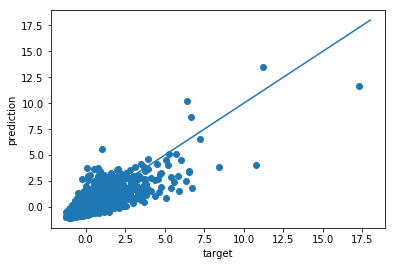

In [22]:
plt.scatter(testY, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round(min(min(testY), min(predictions)))
ymax = np.ceil(max(max(testY), max(predictions)))
r = range(int(ymin), int(ymax) + 1)
plt.plot(r,r)
plt.show()

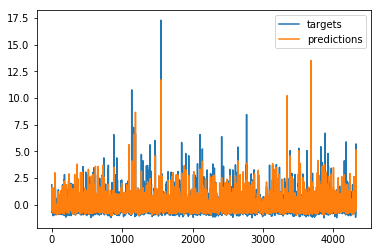

In [23]:
plt.plot(testY, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

In [26]:
lr = LinearRegression()
print("linear regression performance: %f" % (cross_val_score(lr, trainX, trainY).mean()))

linear regression performance: 0.516288


In [27]:
print("random forest regressor performance: %f" % (cross_val_score(rfregressor, trainX, trainY).mean()))

random forest regressor performance: 0.617846
